# Lecture Notes 
# A Mathematical Introduction to Bayesian Data Science
##### @Author: Nicole Chant
###### 27/11/2020
###### Datasets provided by

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
def fuc(m,n):
    return (56+2**(-m)*992*8+2**(-m-n)*992*991+2**(-n)*8*992)/(2+2**(-m)*992*2+2**(-m-n)*998*997+2**(-n)*2*998)

def fuc2(m):
    return (8*2**(m)+992)/(2**(m+1)+998)

def evidence(m):
    return -2*np.log(2)+np.log(fuc2(m))

def evidence2(m,n):
    return -2*np.log(2)+np.log(fuc(m,n))

def line(m):
    return m*np.log(2)+np.log(32/(2*992+8*998))

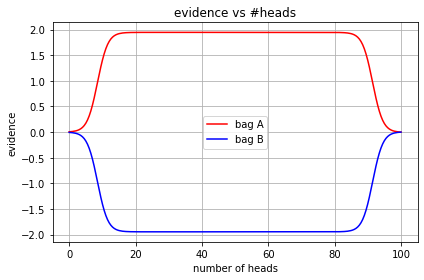

In [4]:
k1 = 100
k2 = 30
m = np.linspace(0,100,200)
plt.plot(m,evidence2(m,k1-m),color='red')
#plt.plot(m,evidence2(m,k2-m),color='orange')
plt.plot(m,-evidence2(m,k1-m),color='blue')
plt.xlabel('number of heads')
plt.ylabel('evidence')
plt.title('evidence vs #heads')
plt.legend(['bag A','bag B'],loc=0)
plt.tight_layout()
plt.grid()
plt.show()

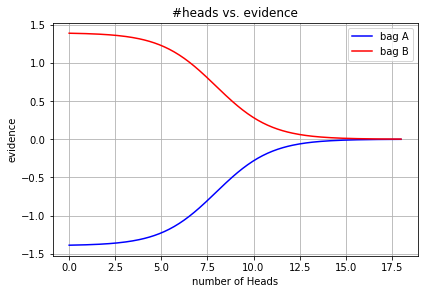

In [5]:
m = np.linspace(0,18,200)
plt.plot(m,evidence(m),color='blue')
plt.plot(m,-evidence(m),color='red')
#plt.plot(m,line(m),color='orange')
plt.grid()
plt.xlabel('number of Heads')
plt.ylabel('evidence')
plt.legend(['bag A','bag B'],loc=0)
plt.tight_layout()
plt.title('#heads vs. evidence')
plt.show()

In [310]:
import random

class urnmodel():
    '''This is an urn.'''
    created_urns = []
    def __init__(self,**colors):
        self.colors = colors
        self.record = []
        self.urn = []
        for color in self.colors.keys():
            for i in range(0,self.colors[color]):
                self.urn.append(color)
        urnmodel.created_urns.append(self)
        
    def draw(self,n=1):
        draws = []
        for i in range(0,n):
            drawn = random.choice(self.urn)
            draws.append(drawn)
            self.colors[drawn] -= 1
            self.urn.remove(drawn)
            self.record.append(drawn)
        return drawn if n==1 else draws
    
    def collect(self):
        for color in self.colors.keys():
            self.colors[color] += self.record.count(color)
            self.urn += self.record
        self.record = []
        
    def add(self,color,n):
        '''Adds to the urn a number of balls of specified color.'''
        if color in self.colors: 
            self.colors[color] += n
            self.urn.extend([color for i in range(0,n)])
        else: print('This color doesn\'t exist in the urn.')
            
    def __str__(self):
        if len(self.urn)==0: return 'An empty urn.'
        s = 'This urn consists of {:d} balls: \n'.format(sum(self.colors.values()))
        for color, number in self.colors.items():
            s+= f'{number} balls of color {color}\n'
        return s
        

In [311]:
urn = urnmodel(blue=12,green=13,yellow = 15)
print(urn)

This urn consists of 40 balls: 
12 balls of color blue
13 balls of color green
15 balls of color yellow



In [312]:
draw = urn.draw()
print(draw)

yellow


In [313]:
print(urn)

This urn consists of 39 balls: 
12 balls of color blue
13 balls of color green
14 balls of color yellow



In [314]:
urn.collect()
print(urn)

This urn consists of 40 balls: 
12 balls of color blue
13 balls of color green
15 balls of color yellow



In [315]:
urn.add('blue',5)
print(urn)

This urn consists of 45 balls: 
17 balls of color blue
13 balls of color green
15 balls of color yellow



In [316]:
class BayesBot(urnmodel):
    '''This is a Bayesian Bot. You may call me Frida.'''
    
    def __init__(self,urn):
             self.urn = urn
            
    def probof(self,color):
        return self.urn.colors[color]/sum(self.urn.colors.values())
    
    def proball(self):
        proball = {}
        for color in self.urn.colors:
            proball[color] = float(self.probof(color))
        return proball

In [317]:
bot = BayesBot(urn)

In [318]:
bot.probof('blue')

0.37777777777777777

In [319]:
bot.proball()

{'blue': 0.37777777777777777,
 'green': 0.28888888888888886,
 'yellow': 0.3333333333333333}

In [320]:
sum(bot.proball().values())

1.0

**Polyas Urn**

Let an urn containing $r$ red and $b$ black balls. We choose a ball at randomly and record its color. Then, the chosen ball along with another $c > 0$ balls of the same colors are added to the urn. This procedure is repeated $n-1$ more times, i.e. the number of choices we conduct from the urn are $n$ in total.
<br> Suppose that the second chosen ball was red. Given that $n=30$, $r = 100$ , $b = 50$, and $c = 17$, calculate the probability of the following:
<br> a) first ball was red,
<br> b) first ball was black.

**Creating a Coin**

In [289]:
class Coin():
    '''This is a coin.'''
    all_coins = []
    def __init__(self,p):
        self.p = float(p)
        Coin.all_coins.append(self)
        
    def flip(self,letters=False):
        if not letters: return 1 if random.random()<=self.p else 0
        return 'Heads' if random.random()<=self.p else 'Tails'
    
    def flipmany(self,n,plot=False):
        '''Returns a list containing the result of multiple Bernoulli trials.'''
        results = []
        for i in range(n):
            scs = 0
            if self.flip()==1: scs = 1
            results.append(scs)
        if plot:
            rslts = [results.count(1),results.count(0)]
            base = ['Heads','Tails']
            plt.bar(base,rslts,color='blue')
            plt.xticks(base)
            plt.xlabel('#_of_counts')
            plt.grid()
            plt.tight_layout()
            plt.show()
        return results
    
    def flipuntilsuccess(self):
        '''Returns the number of flips until the first success.'''
        flips = 1
        while True:
            if self.flip()==1: return flips
            flips +=1
            
    def flipuntil(self,n):
        '''Returns the number of flips required for multiple successes.'''
        scs = 0
        flips = 0
        while True:
            if self.flip()==1: scs+=1
            flips+=1
            if scs==n: return flips
            
    def fair(self):
        return 'No' if self.p != 0.5 else 'Yes'
    
    def __str__(self):
        return 'This is a coin with probability {:1.2f}% of obtaining Heads.'.format(self.p*100)

In [290]:
faircoin = Coin(0.5)
faircoin.flip()

1

In [291]:
faircoin.flip(letters=True)

'Heads'

In [292]:
faircoin.flipuntilsuccess()

1

In [293]:
faircoin.flipuntil(5)

10

In [294]:
faircoin.flipmany(10)

[0, 0, 0, 1, 1, 1, 1, 0, 1, 1]

In [295]:
#faircoin.flipmany(50,plot=True)

In [296]:
print(faircoin)

This is a coin with probability 50.00% of obtaining Heads.


**Answering problems with the urn class**

An urn A contains 3 white and 2 black balls, while a second urn B contains 2 white and 8 black balls. We toss a fair coin, and if it is heads we extract one ball from the urn I, while if it is tails we extract one ball from the urn II.
<br> a) What is the probability the extracted ball to be white?
<br> b) What is the probability a second extracted ball from the same urn we chose before, to be also white?
<br> c) What is the probability a second extracted ball from a randomly chosen urn (coin flip), to be also white?
<br>
<br> We will utilise the urn class to answer the above questions.

In [338]:
urnA = urnmodel(white=3,black=2)
urnB = urnmodel(white=2,black=8)
coin = Coin(0.5)
print(urnA)
print(urnB)
print(coin)

This urn consists of 5 balls: 
3 balls of color white
2 balls of color black

This urn consists of 10 balls: 
2 balls of color white
8 balls of color black

This is a coin with probability 50.00% of obtaining Heads.


In [335]:
urnA.urn

['white', 'white', 'white', 'black', 'black']

In [336]:
urnA.draw(2)

['white', 'black']

In [337]:
print(urnA)

This urn consists of 3 balls: 
2 balls of color white
1 balls of color black



In [341]:
def prob(N=20000):
    M = N
    scs = 0
    while True:
        urnA = urnmodel(white=3,black=2)
        urnB = urnmodel(white=2,black=8)
        coin = Coin(0.5)
        if coin.flip()==1: draw = urnA.draw() 
        else: draw = urnB.draw()
        if draw == 'white': scs+=1
        N-=1
    return float(scs)/M

**Possesion Problem**

If $n$ balls are randomly distributed among $r$ urns, what is the probability for no urn to contain more than one ball?
<br> Hence, any urn can contain either 1 or 0 balls.

In [345]:
n = 100
r = 50
balls = ['b' for i in range(n)]
urns = [f'urn {i}' for i in range(1,r+1)]
allurns = {}
for urn in urns:
    allurns[urn] = []

In [ ]:
N = 10000
while True:
    for ball in balls:
        urn = random.choice(allurns.keys())
        allurns[urn].append(ball)

**Birthday Problem**

You enter a room n people. What is the probability for at least two people to share the same birthday? We assume that everybody is equally likely to have hers or his birthday on any of the 365 available days.

In [100]:
days = [i for i in range(1,365)] #days
n = 100 #number of people

We will randomly form our room of n guests and place their birth dates on a Python list. If at least two people share the same birthday, then we have a success. We want to estimate the probability of the success.

In [101]:
x = [1,2,1,2,3,1,2,1]
y = list(filter(lambda y:x.count(y)>1,x))
y

[1, 2, 1, 2, 1, 2, 1]

In [102]:
import random

def prob(n):    
    N = 10000
    M = N
    success = 0
    while N>0:
        birthdays = []
        for i in range(n):
            birthdays.append(random.choice(days))
        duple = list(filter(lambda x: birthdays.count(x)>1, birthdays))
        if len(duple)>0: success +=1
        N -= 1
    return success/M

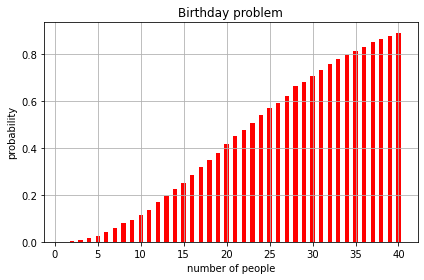

In [103]:
n = np.arange(1,41,1)
f = np.array([prob(i) for i in n])
plt.bar(n,f,width=0.5,color='red')
plt.ylabel('probability')
plt.xlabel('number of people')
plt.title('Birthday problem')
plt.grid()
plt.tight_layout()
plt.show()

**Coincidences**

In [ ]:
#permutations
x = ['a','b','c','d','e']
random.shuffle(x)
x

We have a **coincidence** whenever the index position of a listed objected remains coicidentially invariant under a permutation, i.e. a reordering of the listed objects. For example, if the initial ordering is x = ['a','b','c','d','e'] and then performing a permutation on this list yields ['b', 'd', 'a', 'c', 'e'], we have a coicidence, since 'e' object has the same index. We consider as a success to have *at least* one coincidence.

<br> Below, we will formulate this logic in a Python program.

In [104]:
import math
import random

def coincidence(my_list1,my_list2):
    for i in range(0,len(my_list1)):
        if my_list1[i] == my_list2[i]: return True
    return False

def probcoi(n,N=10000,prints=False):
    if prints==True: print('Completed:')
    my_list1 = [i for i in range(0,n)]
    successes = 0
    M = N
    while N>0:
        my_list2 = my_list1[::]
        random.shuffle(my_list2)
        if coincidence(my_list1,my_list2): successes+=1
        N-=1
        #s = ''
        if prints==True: 
            if N%200==0:
                x = (M-N)*100/M
                s = '\r['+'-'*math.floor(x/8)+ '{:1.0f}%'.format(x) + '-'*math.floor(x/8)+']'
                print(s,end="",flush=True)
    if prints==True: 
        print()
        print(f'Probability of coincidence with {n} objects:')
    return float(successes)/M

In [105]:
for i in range(0,10):
    #print('hello',end='')
    print('\rhello',end='')

hello

In [121]:
n = 2 #number of positions
probcoi(n,100000,prints=True)

Completed:
[------------100%------------]
Probability of coincidence with 2 objects:


0.50061

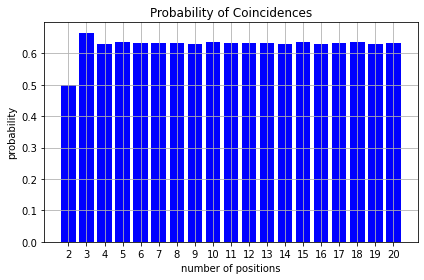

In [120]:
import numpy as np
n = np.arange(2,21,1)
f = np.array([probcoi(i,N=30000) for i in n])
plt.bar(n,f,color='blue')
plt.xlabel('number of positions')
plt.ylabel('probability')
plt.title('Probability of Coincidences')
plt.xticks(n)
plt.grid()
plt.tight_layout()
plt.show()

Let $i$ and $j$ denote two different indexes in the list of the above coincidence problem. We pose the following questions:
<br> a) What is the probability to have a coincidence on position $i$ but not on position $j$?
<br> b) Having in granted that there's no coincidence in index $r$, estimate the probability of having a coincidence at index $i$.
<br> Create two Python functions that take as an argument the lists, as well as the indexes $i$ and $j$ and return the respective probabilities.

a) What is the probability to have a coincidence on position $i$ but not on position $j$?

In [136]:
def probcoi2(n,i,j,N=20000):
    my_list1 = [m for m in range(0,n)]
    successes = 0
    M = N
    while N>0:
        my_list2 = my_list1[::]
        random.shuffle(my_list2)
        if (my_list1[i]==my_list2[i]) & (my_list1[j]!=my_list2[j]): successes+=1
        N-=1
    return float(successes)/M

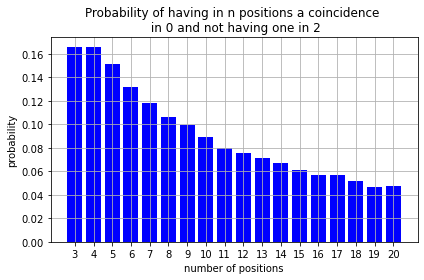

In [138]:
n = np.arange(3,21,1)
i , j = 0,2
f = np.array([probcoi(x,i,j,N=40000) for x in n])
plt.bar(n,f,color='blue')
plt.xlabel('number of positions')
plt.ylabel('probability')
plt.title('Probability of having in n positions a coincidence \n in {} and not having one in {}'.format(i,j))
plt.xticks(n)
plt.grid()
plt.tight_layout()
plt.show()

We see that the probabilities are independent of the given indexes! Moreover, as the number of positions increases its even more unlikely to have a coincidence in one index and not have a coincidence in another. This can intuitively be justified if we think that for a low number of available indexes (object positions), is more probable to have simultaneously two coincidences. For example, if the length of the list equals 2, then a coincidence in index 0 equivalently corresponds to a coincidence in index 1 and vice versa. On a list of length 3, a coincidence in 1 and a non-coincidence in 2, leaves us with the options 2-->0,0-->2. On a list of length 4, the same event, leaves us the options 2-->0 or 3.

 b) Having in granted that there's no coincidence in index $j$, estimate the probability of having a coincidence at index $i$.

In [134]:
def probcoi3(n,i,j,N=20000):
    my_list1 = [m for m in range(0,n)]
    my_list1 = my_list1[:j]+my_list1[j+1:]
    successes = 0
    M = N
    while N>0:
        my_list2 = my_list1[::]
        random.shuffle(my_list2)
        if my_list1[i]==my_list2[i]: successes+=1
        N-=1
    return float(successes)/M

**Laplace Prior**

Suppose we are given a coin with heads on one and tails on the other side. We are told to estimate the probability of getting heads with that particular coin. Let $\theta$ be the probability parameter that we want to estimate. One think that seems peculiar when first conducting bayesian analysis is that sometimes we get to assign probabilities to probabilities. We accept that the probability $\theta$ of getting heads is fixed but due to our lack of perfect information we nevertheless behave *as it was* a random quantity. In this way we express our uncertainty. Upon closer examination of the coin ... Let's suppose now that we don't have any reason to believe that the probability of obtaining heads is around a particular value. And since we are indifferent about the various possible values of $\theta$ we may as well assign *equal weight* to various possibilities of $\theta$. This *equal weight* expresses the probability parameter $\theta$ has the same probability to be found at any interval of infinitesimal length. Thus, we are assigning a uniform prior on $(0,1)$ that expresses our uncertainty about $\theta$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
points = 200
x = np.linspace(0,1,points)
y = np.ones(points)
plt.plot(x,y,color='green')
plt.title('prior of θ')
plt.grid()
plt.tight_layout()
plt.show()

Now suppose that we start experimenting with the given coin. Let $X_{1},\dots,X_{n}$ the $n$ independent and identical distributed results of tossing the coin $n$ times in row. On any trial $i$, the result is encoded in the random variable $X_{i}$ as either 0 or 1, corresponding to the results 'tails' and 'heads', respectively. To calculate the total amount of heads in $n$ coin tosses, we define the random variable $S_{n} = X_{1} + \cdots + X_{n}$. Now, we know that
$S_{n}$ is binomial with parameter $n$ and $\theta$. To encode the results in a more succint way, we define the random vector $X = (X_{1},\dots,X_{n})$. Suppose that after performing the experiment we obtained the following results: $X_{1}=x_{1},\dots,X_{n}=x_{n}$ or, equivalently, $X = x$. The likelihood $P(X|\theta)$ of obtaining the result under a fixed parameter $\theta$ is calculated as follows:
            \begin{equation}
            \begin{split}
             P(X|\theta) = & P ( X_{1} = x_{1} , \dots , X_{n}=x_{n} | \theta ) \\
                         = & \prod_{i} P(X_{i}=x_{i}|\theta) \\
                         = & \theta^{x_{1}+\cdots+x_{n}}(1-\theta)^{n-x_{1}-\cdots-x_{n}} \\
                         = & \theta^{S_{n}}(1-\theta)^{n-S_{n}}. \\
           \end{split}
           \end{equation}
We will now use Bayes rule to determine the posterior distribution of $\theta |X$.
<br> Note that:
        \begin{equation*}
        \begin{split}
        f ( \theta | X ) = & \frac{ f(X|\theta)f(\theta)}{f(X)} \\
                         = & \frac{f(X|\theta)f(\theta)}{\int_{\theta \in (0,1)} f(X|\theta)f(\theta)d\theta} \\
                         = & \frac{\theta^{x}(1-\theta)^{n-x}}{\int_{0}^{1} \theta^{x}(1-\theta)^{n-x} d\theta}  \\
                         = & \frac{\theta^{x}(1-\theta)^{n-x}}{B(x+1,n-x+1)} \\
                         = & \frac{(n+1)!}{x!(n-x)!} \theta^{x}(1-\theta)^{n-x}, \ 0<\theta<1. \\
        \end{split}
        \end{equation*}
Thus, the posterior distribution of $\theta$ is given by
         $$f (\theta|X) = \frac{(n+1)!}{x!(n-x)!} \theta^{x}(1-\theta)^{n-x} , \ 0<\theta<1.$$
We can graph this in Python for various parameters $x$ and $n$.

In [ ]:
from scipy.stats import beta
num_trials = 10
suc_parameter = np.array([i for i in range(0,num_trials+1)])
x = np.linspace(0,1,points)
index =1
for parameter in suc_parameter[:10:3]:
    plt.plot(x,beta.pdf(x,parameter,num_trials-parameter+1),label='posteriors {:d}'.format(index))
    index+=1
plt.title('posterior of θ for various data')
plt.ylabel('density')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

**The Cursed Law**

Laplace wanted to compute the probability that the $(n+1)$th event will happen, i.e. $X_{n+1}=1$ if we know that we in the past the event had occurred $x$ times in total; that is $X_{1}+\cdots+X_{n}=x$. Since the events are assumed independent of one another, note that
\begin{equation}
  P(X_{n+1}=1|X_{1}+\cdots+X_{n}=x,\theta) = \mathbb{E}[\theta|X] = \frac{x+1}{n+1}.
\end{equation}
This is Laplace's **law of succession** and it was heavily criticized. Although all the critics failed to take in mind Laplace's suggestions and own skepticism about this result.

In the case where we perfome two trials $n=2$ and we obtain 1 success, then the posterior distribution is given by
           $$f(\theta|X=1) = 6 \theta (1-\theta) = 6 \theta - 6 \theta^{2}, \ 0 < \theta <1.$$
We define a $1-\alpha$%-**credible region** for $\theta$ a subset $C_{\alpha}$ of the parameter space $\Theta = (0,1)$ such that there's $\alpha$% probability to contain the true value of the parameter, i.e. a subset $C_{\alpha}$ such that
             $$P ( l<\theta<u|X) = \int_{\theta \in C_{\alpha}} p(\theta|X) d \theta = 1 - \alpha.$$
There are infinitely many such choices which define $1-\alpha$% credible interval for the parameter. In most cases, we will use either a *symmetrical equal tailed* credible interval or a *higher density credible interval (HDI)*. The equal tailed $1-\alpha$% credible interval is a $1-\alpha$% credible interval $C_{\alpha}$ satisfying the additional condition:
**Credible Intervals**
<br> A Bayesian credible interval of size $1-\alpha$ is an interval $(l,u)$ such that
$$P(l\leq \theta \leq b|X=x)=1-\alpha$$
The definition of credible intervals could lead to many choices of $(l,u)$ for particular problems; hence they're not uniquely determined. Suppose that we required our credible interval to have equal probability $\alpha/2$ in each tail. That is, we will assume:
$$P(\theta<l|X=x)= \frac{\alpha}{2}$$
and
$$P(\theta>u|X=x)= \frac{\alpha}{2}.$$
Since, the cumulative distribution function of any random variable $X$,
       $$F_{X} (x) = P(X \leq x)$$
is increasing, we can calculate the points $l_{\alpha}$ and $u_{\alpha}$ as follows:
   $$l_{\alpha} = F^{-1} \left( \frac{\alpha}{2} \right) \text{ and } u_{\alpha} = F^{-1} \left( 1 - \frac{\alpha}{2}\right).$$
Thus, the credible interval is:
        $$(l_{\alpha},u_{\alpha}) = \left( F^{-1}\left( \frac{\alpha}{2} \right) , F^{-1} \left( 1 - \frac{\alpha}{2} \right) \right).$$

<br> In our example, we will calculate a $\alpha$% equaled tail and HD credible interval. Consider two arbitrary real numbers $a$ and $b$ such that $0<a<b<1$. Note that
        \begin{equation}
        \begin{split}
             \int_{a}^{b} p(\theta|X)d\theta = & \int_{a}^{b} (6\theta - 6\theta^{2})d\theta \\
             = & 3 (b^{2}-a^{2}) - 2(b^{3}-a^{3}). \\
        \end{split}
        \end{equation}
We instantly see that there are infinitely number of pairs $(a,b)$ with $0<a<b<1$ that satisfy the equation:
          $$3 (b^{2}-a^{2}) - 2(b^{3}-a^{3}) = 1-\alpha.$$
Equivalently
       $$\int_{0}^{a} p(\theta|X)d\theta = 3a^{2}-2a^{3} = \frac{\alpha}{2}$$
and $$\int_{b}^{1} p(\theta|X)d\theta = 3(1-b^{2})-2(1-b^{3}) = 1 - 3b^{2} +2b^{3} = \frac{\alpha}{2}.$$

<br> If we now assume that $n$ is an arbitrary positive integer but $x =0$, i.e. we haven't got any successes so far. Then
        \begin{equation}
        \begin{split}
        \int_{a}^{b} p(\theta|X)d\theta = & \int_{a}^{b} (n+1)(1-\theta)^{n}d\theta \\
                                        = & \int_{1-b}^{1-a} (n+1)u^{n} du \\
                                        = & (1-a)^{n+1} - (1-b)^{n+1}. \\
        \end{split}
        \end{equation}
The equal tailed credible interval must satisfy:
       $$\int_{0}^{a} p(\theta|X)d\theta = \frac{\alpha}{2} \text{ and } \int_{b}^{1} p(\theta|X)d\theta = \frac{\alpha}{2}.$$
Hence,
      $$1 - (1-a)^{n+1} = \frac{\alpha}{2} \text{ and } (1-b)^{n+1} = \frac{\alpha}{2}$$
Equivalently,
       $$a = 1 - \sqrt[n+1]{ 1 - \frac{\alpha}{2}} \text{ and } b = 1 - \sqrt[n+1]{ \frac{\alpha}{2}}.$$
Substituting $\alpha = 0.95$, we obtain:
      $$(a,b) = (0.0063 , 0.60).$$

In [ ]:
##calculate equal-tailed a% credible interval
def _lefttail(a,num_trials): return 1-(1-a/2)**(1/(num_trials+1))

def _righttail(a,num_trials):return 1-(a/2)**(1/(num_trials+1))

def credible(a,num_trials,show=True):
    if show:
        print('Calculating {:1.2f}% equal-tailed credible interval...'.format((1-a)*100))
        print('[',end='')
        for i in range(30):print('{:s}'.format('-'),end = '')
        print('({:1.2f},{:1.2f})'
              .format(_lefttail(a,num_trials),_righttail(a,num_trials)),end='')
        for i in range(30):print('{:s}'.format('-'),end ='')
        print('] 100%',end='')
    return (_lefttail(a,num_trials),_righttail(a,num_trials)) 

In [ ]:
num_trials = int(input('Enter the number of trials...'))
parameter = 0
a = 0.05 ##credibility
x = np.linspace(0,1,200)
quantiles = credible(a,num_trials)
_posterior = lambda x,parameter,num_trials: beta.pdf(x,parameter+1,num_trials-parameter+1)

plt.plot(x,_posterior(x,parameter,num_trials),color='blue')
plt.plot(quantiles,(0,0),marker='o',color='black',linestyle='None')
plt.fill_between(x,_posterior(x,parameter,num_trials),0,
                 where=(x>=quantiles[0])&(x<=quantiles[1])
                ,color='yellow')
plt.legend(['posterior distribution','{:1.2f}% credible interval'.format((1-a)*100)
            ,'{:1.2f}% probability'.format((1-a)*100)])
plt.title('posterior of θ for various data')
plt.xlabel('parameter values')
plt.ylabel('density')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
print('a= ',fuc(0.95),'& b= ' , fuc2(0.95))

Problem: Compute a 95% equal tailed and a 95% HD credible interval for the case where $x = 3$ and $n=3$. 

**The Exponential Distribution**

$$f_{X}(x;\Lambda) = \Lambda e^{-\Lambda},x\geq0$$
$$f_{\Lambda}(\lambda ;a,b) = \frac{\lambda^{a-1}b^{a}e^{-a\lambda}}{\Gamma(a)},\ \lambda>0.$$
$$P(X = x|\Lambda) = \Lambda^{n} e^{-\Lambda \sum_{i} x_{i}}$$
<br> Thus, by the law of total probability
       \begin{equation}
       \begin{split}
       f(X) = & \int_{0}^{\infty} f(X|\lambda)f(\lambda)d\lambda \\
            = & \int_{0}^{\infty} \lambda^{n} e^{-\lambda \sum_{i} x_{i}} \lambda^{a-1}b^{a}e^{-a\lambda}d\lambda \\
            = & \int_{0}^{\infty} \lambda^{n+a-1} b^{a} e^{-\lambda \left(\sum_{i}x_{i}+a\right)} d \lambda \\
            = & \Gamma \left(n+a,\sum_{i}x_{i}+a\right).\\
       \end{split}
       \end{equation}
Finally, Bayes rule gives us:
\begin{equation}
\begin{split}
P ( \Lambda = \lambda |X) = & \frac{f(X|\Lambda)f(\Lambda)}{f(X)} \\
               = & \frac{\lambda^{n} e^{-\lambda \sum_{i} x_{i}} \lambda^{a-1} b^{a}e^{-a\lambda}}{\Gamma \left(n+a,\sum_{i}x_{i}+a\right)} \\
               = & \Gamma \left(\lambda ; n+a , \sum_{i}x_{i}+a\right). \\
\end{split}
\end{equation}
Thus,
         $$\Lambda|a,b \sim \Gamma\left(n+a,\sum_{i}x_{i}+a\right).$$

In [ ]:
from scipy.stats import gamma
a = 0.01
x = np.linspace(0,20,points)
for parameter in suc_parameter[:4]:
          plt.plot(x,gamma.pdf(x,a+num_trials,scale=1/(parameter+a)),label='posterior')
plt.grid()
plt.legend()
plt.title('posterior exponential variable')
plt.ylabel('density')
plt.tight_layout()
plt.show()

**The Pareto Distribution**

\begin{equation}
f_{X}(x;x_{m},\alpha) = 
          \begin{cases}
          &\frac{\alpha x_{m}^{\alpha} }{x^{\alpha+1}} , \ x \geq x_{m} \\
          & 0 , \ x < x_{m}.\\
          \end{cases}
          \end{equation}

**Cauchy Distribution: A pathological example**

$$f(x;a,b) = \frac{1}{\pi b} \frac{b^2}{(x-a)^{2}+b^{2}}$$
$$\theta_{\text{MLE}} =$$

\begin{equation}
\begin{split}
-\log L = & - \sum_{i} \log \left( \frac{1}{\pi b} \frac{b^2}{(x_{i}-a)^{2}+b^{2}} \right) \\
       = & \sum_{i} \log (b^{2}+(x_{i}-a)^{2}) - n \log \left( \frac{b}{\pi}\right) \\
\end{split}
\end{equation}
Thus,
\begin{equation}
\begin{split}
- \frac{ d \log \mathcal{L}}{da} = & \sum_{i} \frac{1}{b^{2}+(x_{i}-a)^{2}}\\
\end{split}
\end{equation}

**Normal Distribution**

**Bayesian Decision Theory**

"We noted that there is nothing in probability theory per se which could tell us where to put the critical levels at which the robot changes its decision: whether to accept the batch, reject it, or perfome another test. The location of these critical levels obviously depends in some way on value judgments as well as on probabilities; what are the consequences of making wrong decisions, and what are the costs of making further tests?"
<br> Probability theory only determines the state of knowledge about the parameter but it tells us nothing about the estimate we should make. 
<br> "A common feature of all the problems considered thus far was: probability theory alone can solve only the inference problem; i.e. it can give us only a probability distribution which represents the robot's final state of knowledge with all the available prior information and data taken into account. But in practice its job does not end at that point. *An essential thing which is still missing in our design of this robot is the rule by which it converts its final probability assignment into a **definitive course of action**.*"
<br> ~ *Edward Jaynes*

In Bayesian statistics we want to estimate an unknown parameter $\theta$. Before we can apply Baye's rule we assign a prior to $\theta$, that is a probability distribution that represents our prior to the data beliefs about where the parameter $\theta$ *might lie*. Values which are considered more likely will correspond to higher density in the prior belief representation. Note here that in the Bayesian framework $\theta$ is treated as a *random variable* in contrast to the classical approach but, nevertheless, is **assumed to be a fixed quantity**. Hence, the uncertainty of the true value of the parameter lies in our lack of information about the state of the world and not in its inherent stochasticity.
<br> After we perfome an experiment and obtain some data, then by using the Bayes rule we can update our beliefs about the possible values of the parameter $\theta$.
<br> In real life, we must choose a certain value, act in a *certain way*, and this demands on our behalf to pick a certain value that we consider to lie close to the fixed but unknown parameter of which true value we can only speculate via the probability distribution of $\theta$. At first glance, this seems to contradict the Bayesian spirit but as we have already mentioned probability theory on its own is unable to provide us with a definite answer about what our approximation or **estimation** should be. Bayesian decision theory formalizes the process of *translating information into action*. Suppose that we have observed the data $D$. Before the data were observed we had a prior belief $p(\theta)$ about the values of $\theta$. Updating our beliefs via Bayes rule, we arrive at a new posterior belief $p(\theta|D)$ about the potential values of $\theta$. If no data were obtained, then simply our prior beliefs didn't change at all, i.e. $p(\theta) = p(\theta|D)$. After finishing the inference procedure we must come up with a definite estimate, which we will denote by $\hat{\theta}(D)$ about the true value of the parameter. What we need to come up with is an algorithmic procedure, which we will refer to as the *choice mechanism*, with input the posterior distributon of $\theta$ and output the estimator choice $\hat{\theta}(D)$. 
<br> Certain issues arise from the discussion above. First of all, the notation might seen as problematic. At the same time $\theta$ while is treated as a random variable, it possesses an *unknown* but *fixed* value, which is again denoted by $\theta$! Probability enters only as a *lack of perfect information* about the world and represents our *state of beliefs* about the parameter $\theta$, which are modeled by a prior distribution on the random variable $\theta$. The role of probability theory ends the moment we update our state of beliefs via Bayes rule and at that point we enter the realm of decision theory. We could for now, denote $\theta^{\ast}$ the unknown but fixed and true value of the parameter and $\hat{\theta}(x)$ the estimator of $\theta^{\ast}$ produced by the algorithmic procedure. If $\theta^{\ast}$ can take on real values on a continuum, then it will be modeled by a continuous random variable $\theta$. In that case, we know from classical probability theory that $P(\theta=\theta^{\ast})=0$. This should not surprise us.
<br> All the above lead us to define the **loss function** $L (\hat{\theta}(x),\theta^{\ast})$ with information level $x$, which measures *the amount of loss* caused by the discrepancy between estimator and estimated; that is, the loss function $L$ quantifies the loss induced by the report $\theta = \hat{\theta}(x)$ (under information level $x$), when, in fact, the data were generated by $\theta = \theta^{\ast}$ (the true value of the parameter). The form of $L$ is highly depended on the decision problem at hand, but in general we expect (or assume) that loss will analogue to the produced discrepancy or the euclidean distance between $\hat{\theta}(x)$ and $\theta^{\ast}$. 
<br> After having chosen the appropriate loss function for our problem, we then calculate the *expected loss* or the **posterior risk** caused by our choice $\hat{\theta}(x)$, i.e.
        $$\mathbb{E}_{\theta} [ \mathcal{L}(\hat{\theta}(x),\theta|x )] = \int_{ \theta|x \in \Theta } \mathcal{L} ( \hat{\theta}(x), \theta|x ) P ( \theta|x ) d \theta.$$
Now we are ready to define the mechanism by which we will decide and that is no else that *posterior risk minimization*; that is, under data $x$ we will decide that course action $\delta^{\ast}(x) = \hat{\theta}(x)$ which minimizes the posterior risk or, equivalently, the expected loss or the expected discrepancy between our estimation and the true value of the unknown parameter. The decision $\hat{\theta}(x)$ which minimizes posterior risk will be refer to as **Bayes estimator**, i.e.
        $$\delta^{\ast}(x) = \hat{\theta}(x) = \min_{ \hat{\theta} } \mathbb{E}_{ \theta } [ \mathcal{L}(\hat{\theta},\theta)|X].$$ 
Some possible and popular choices for the loss function are illustrated below.
<br> *The binary (0-1) loss function*:
      \begin{equation}
      \mathcal{L}(\hat{\theta}(x),\theta^{\ast}) =
      \begin{cases}
           & 1 , \text{ if} \hat{\theta}(x) \neq \theta^{\ast} \\
           & 0 , \text{ otherwise.}
      \end{cases}
      \end{equation}
In the discrete case:
         \begin{equation}
     \begin{split}
     \mathbb{E}_{\theta} [\mathcal{L}(\hat{\theta}(x),\theta)] = & \sum_{\theta \in \Theta} \mathcal{L}(\hat{\theta}(x),\theta)f(\theta|X)d\theta \\
     = & \sum_{\theta \in \Theta} f (\theta|X)d \theta - P(\hat{\theta}=\theta) \\
     = & 1 - P(\hat{\theta}=\theta). \\
     \end{split}
     \end{equation}
Hence, the risk is minimized if ... Note that
     \begin{equation}
     \begin{split}
     \mathbb{E}_{\theta} [\mathcal{L}(\hat{\theta}(x),\theta)] = & \int_{\theta \in \Theta} \mathcal{L}(\hat{\theta}(x),\theta)f(\theta|X)d\theta \\
     = & \int_{\theta \in \Theta} f (\theta|X)d \theta = 1!. \\
     \end{split}
     \end{equation}
With great goals there come the great miseries!

<br> *The quadratic loss function*:
          $$\mathcal{L}(\hat{\theta}(x),\theta) = (\hat{\theta}-\theta)^{2}.$$
In this case, note that
          \begin{equation}
          \begin{split}
          \mathbb{E}_{\theta}[\mathcal{L}(\hat{\theta}(x),\theta)] = & \int_{\theta \in \Theta} \mathcal{L} (\hat{\theta}(x),\theta) f(\theta|x) d \theta \\
          = & \int_{\theta \in \Theta} (\hat{\theta}(x)-\theta)^{2} f(\theta|X) d\theta \\
          = & \hat{\theta}(x)^{2} \int_{\theta \in \Theta} f(\theta|X)d\theta - 2 \hat{\theta}(x) \int_{\theta \in \Theta} \theta f(\theta|X) d\theta + \int_{\theta \in \Theta} \theta^{2} f(\theta|X) d \theta \\
          = & \hat{\theta}(x)^{2} - 2 \hat{\theta}(x) \mathbb{E}_{\theta} [\theta|X] + \mathbb{E}_{\theta} [\theta^{2}|X] \\
          = & (\hat{\theta}(x) - \mathbb{E}_{\theta} [\theta|X])^{2} - \mathbb{E}_{\theta} [\theta|X]^{2} + \mathbb{E}_{\theta} [\theta^{2}|X] \\
          = & (\hat{\theta}(x) - \mathbb{E}_{\theta} [\theta|X])^{2} + Var_{\theta} [\theta|X] \geq Var_{\theta} [\theta|X].\\
          \end{split}
          \end{equation}
Thus, the risk $\mathcal{R}(\hat{\theta}(x))$ is minimized at
           $$\hat{\theta}(x) = \mathbb{E}_{\theta} [\theta|X],$$
and furthermore
             $$\mathcal{R}(\hat{\theta}(x)) = \min_{ \hat{\theta} } \mathcal{R}(\hat{\theta}) = Var_{\theta} [\theta|X],$$
that is, the best we can do is to minimize the risk at the variance of $\theta|X$.
          
Definition: The **Bayes Risk** for a prior $f (\theta)$